## Derivation of the Dyson Series and Justification of Time-Ordering Replacement

### 1. Time Evolution in the Interaction Picture

Let the full Hamiltonian be split into:

$$
H(t) = H_0 + V(t)
$$

The interaction picture evolution operator $U_I(t, 0)$ satisfies the differential equation:

$$
i\hbar \frac{d}{dt} U_I(t, 0) = V_I(t) U_I(t, 0), \quad U_I(0, 0) = I
$$

where the interaction picture perturbation is:

$$
V_I(t) = e^{iH_0 t/\hbar} V(t) e^{-iH_0 t/\hbar}
$$

### 2. Integral Form and Iteration

We can write:

$$
U_I(t, 0) = I - \frac{i}{\hbar} \int_0^t dt_1 \, V_I(t_1) U_I(t_1, 0)
$$

Substituting recursively:

\begin{align*}
U_I(t, 0)
&= I - \frac{i}{\hbar} \int_0^t dt_1 \, V_I(t_1) 
+ \left( -\frac{i}{\hbar} \right)^2 \int_0^t dt_1 \int_0^{t_1} dt_2 \, V_I(t_1) V_I(t_2) \\
&\quad + \left( -\frac{i}{\hbar} \right)^3 \int_0^t dt_1 \int_0^{t_1} dt_2 \int_0^{t_2} dt_3 \, V_I(t_1) V_I(t_2) V_I(t_3) + \cdots
\end{align*}

This becomes:

$$
U_I(t, 0) = \sum_{n=0}^\infty \left( -\frac{i}{\hbar} \right)^n \int_{0 \le t_n \le \cdots \le t_1 \le t} dt_1 \cdots dt_n \, V_I(t_1) \cdots V_I(t_n)
$$

### 3. Replacement by Integration over the Cube

Let us define the time-ordering operator $\mathcal{T}$, which reorders operator products such that times appear in decreasing order:

$$
\mathcal{T}[V_I(t_1) \cdots V_I(t_n)] = V_I(t_{\pi(1)}) \cdots V_I(t_{\pi(n)}) \quad \text{with } t_{\pi(1)} \ge \cdots \ge t_{\pi(n)}
$$

Then:

$$
\int_{0 \le t_n \le \cdots \le t_1 \le t} V_I(t_1) \cdots V_I(t_n) \, dt_1 \cdots dt_n = \frac{1}{n!} \int_{[0, t]^n} \mathcal{T}[V_I(t_1) \cdots V_I(t_n)] \, dt_1 \cdots dt_n
$$

This leads to the Dyson series:

$$
U_I(t, 0) = \mathcal{T} \exp\left( -\frac{i}{\hbar} \int_0^t V_I(t') \, dt' \right)
$$

---

## Justification of Time-Ordering Replacement

Let $f(t_1, \dots, t_n)$ be an integrable function. Define the simplex:

$$
\Delta = \{ (t_1, \dots, t_n) \in [0,t]^n \mid t_1 \ge t_2 \ge \cdots \ge t_n \}
$$

Then:

$$
\int_\Delta f(t_1, \dots, t_n) \, dt_1 \cdots dt_n = \frac{1}{n!} \int_{[0,t]^n} \mathcal{T}[f(t_1, \dots, t_n)] \, dt_1 \cdots dt_n
$$

### Proof:

1. The cube $[0,t]^n$ can be partitioned into $n!$ disjoint regions $D_\pi$ labeled by permutations $\pi \in S_n$, such that:

$$
D_\pi := \{ (t_1, \dots, t_n) \in [0,t]^n \mid t_{\pi(1)} \ge t_{\pi(2)} \ge \cdots \ge t_{\pi(n)} \}
$$

2. For a fixed point $\vec{t} \in [0,t]^n$, there exists a unique permutation $\pi$ such that $\vec{t}_\pi \in \Delta$.

3. Therefore:

$$
\int_{[0,t]^n} \mathcal{T}[f(t_1, \dots, t_n)] \, dt_1 \cdots dt_n = \sum_{\pi \in S_n} \int_{D_\pi} f(t_{\pi(1)}, \dots, t_{\pi(n)}) \, dt_1 \cdots dt_n = n! \int_\Delta f(t_1, \dots, t_n) \, dt_1 \cdots dt_n
$$

Dividing both sides by $n!$ gives the claimed identity.

---

### Examples:

**For $n = 2$:**

$$
\int_0^t dt_1 \int_0^{t_1} dt_2 \, V(t_1)V(t_2) = \frac{1}{2} \int_0^t dt_1 \int_0^t dt_2 \, \mathcal{T}[V(t_1)V(t_2)]
$$

**For $n = 3$:**

$$
\int_0^t dt_1 \int_0^{t_1} dt_2 \int_0^{t_2} dt_3 \, V(t_1)V(t_2)V(t_3) = \frac{1}{6} \int_0^t dt_1 dt_2 dt_3 \, \mathcal{T}[V(t_1)V(t_2)V(t_3)]
$$

These identities allow the Dyson series to be written compactly and handled via time-ordering.


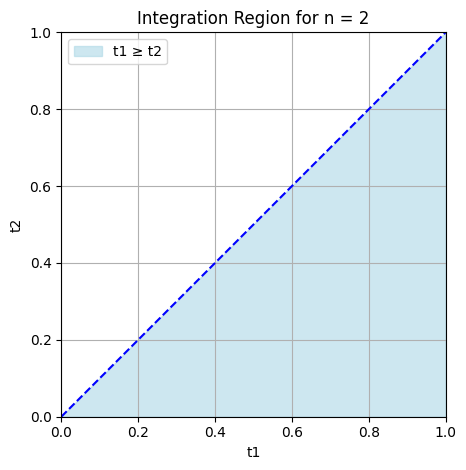

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dyson_region_n2():
    t = 1
    x = np.linspace(0, t, 100)

    fig, ax = plt.subplots()
    ax.fill_between(x, 0, x, color="lightblue", alpha=0.6, label="t1 ≥ t2")
    ax.plot(x, x, color="blue", linestyle="--")
    ax.set_xlabel("t1")
    ax.set_ylabel("t2")
    ax.set_title("Integration Region for n = 2")
    ax.set_xlim(0, t)
    ax.set_ylim(0, t)
    ax.legend()
    ax.set_aspect("equal")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_dyson_region_n2()





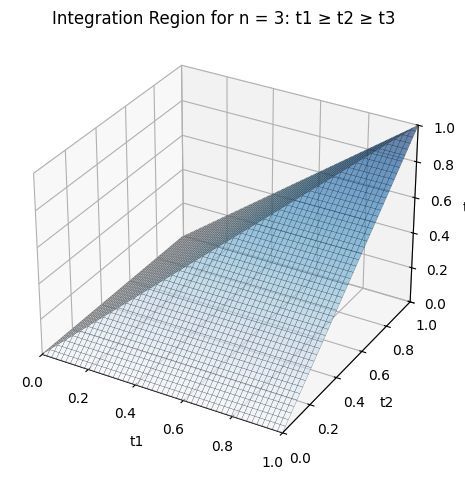

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_dyson_region_n3():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create 3D grid
    t_vals = np.linspace(0, 1, 50)
    T1, T2 = np.meshgrid(t_vals, t_vals)
    T3 = np.minimum(T1, T2)  # Enforce t1 ≥ t2 ≥ t3

    ax.plot_surface(T1, T2, T3, alpha=0.6, cmap=cm.Blues, edgecolor='k', linewidth=0.2)

    ax.set_xlabel("t1")
    ax.set_ylabel("t2")
    ax.set_zlabel("t3")
    ax.set_title("Integration Region for n = 3: t1 ≥ t2 ≥ t3")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    plt.tight_layout()
    plt.show()

plot_dyson_region_n3()



Perfect — here is a **complete, detailed, and mathematically rigorous proof** of the identity used in the Dyson series:

$$
\int_{0 \le t_n \le \cdots \le t_1 \le t} f(t_1, \dots, t_n) \, dt_1 \cdots dt_n = \frac{1}{n!} \int_{[0, t]^n} \mathcal{T}[f(t_1, \dots, t_n)] \, dt_1 \cdots dt_n
$$

This includes all steps: partitioning the cube, permutation arguments, disjointness, and the logic behind introducing the time-ordering operator.

---

## 📘 Detailed Proof of Time-Ordering Integral Identity

Let $f: [0, t]^n \to \mathbb{R}$ (or $\mathbb{C}$) be an integrable function. Define the **time-ordered simplex**:

$$
\Delta = \left\{ (t_1, \dots, t_n) \in [0, t]^n \,\middle|\, t_1 \ge t_2 \ge \cdots \ge t_n \right\}
$$

Let $S_n$ be the set of all permutations $\pi$ of $\{1, \dots, n\}$.

---

### Step 1: Partition of the Cube

The hypercube $[0, t]^n$ can be written as a disjoint union of $n!$ regions:

$$
[0, t]^n = \bigsqcup_{\pi \in S_n} D_\pi
$$

where:

$$
D_\pi = \left\{ (t_1, \dots, t_n) \in [0, t]^n \,\middle|\, t_{\pi(1)} \ge t_{\pi(2)} \ge \cdots \ge t_{\pi(n)} \right\}
$$

These regions are **disjoint except on boundaries** of measure zero (i.e., when two or more $t_i$ are equal). So, for integration purposes, they are disjoint **almost everywhere**.

---

### Step 2: The Unique Permutation That Sorts a Point

For almost every point $\vec{t} = (t_1, \dots, t_n) \in [0, t]^n$, there exists a **unique permutation** $\pi \in S_n$ such that:

$$
(t_{\pi(1)}, \dots, t_{\pi(n)}) \in \Delta
$$

That is, we can **sort the tuple** by decreasing time to land in the simplex $\Delta$.

---

### Step 3: Define the Time-Ordering Operator

We define the time-ordered version of $f$ as:

$$
\mathcal{T}[f](t_1, \dots, t_n) = f(t_{\pi(1)}, \dots, t_{\pi(n)})
$$

where $\pi \in S_n$ is the unique permutation such that $(t_{\pi(1)}, \dots, t_{\pi(n)}) \in \Delta$. So we reorder the arguments of $f$ **into decreasing order**.

---

### Step 4: Integral Over the Cube

Now we compute the integral over the cube:

$$
\int_{[0, t]^n} \mathcal{T}[f(t_1, \dots, t_n)] \, dt_1 \cdots dt_n
= \sum_{\pi \in S_n} \int_{D_\pi} \mathcal{T}[f(t_1, \dots, t_n)] \, dt_1 \cdots dt_n
$$

On the region $D_\pi$, by construction:

$$
\mathcal{T}[f(t_1, \dots, t_n)] = f(t_{\pi(1)}, \dots, t_{\pi(n)})
$$

Hence:

$$
\int_{[0, t]^n} \mathcal{T}[f(t_1, \dots, t_n)] \, dt_1 \cdots dt_n = \sum_{\pi \in S_n} \int_{D_\pi} f(t_{\pi(1)}, \dots, t_{\pi(n)}) \, dt_1 \cdots dt_n
$$

---

### Step 5: Change of Variables in Each Term

Now, perform a change of variables $(t_1, \dots, t_n) \mapsto (t_{\pi(1)}, \dots, t_{\pi(n)})$. Since $\pi$ is just a permutation, the Jacobian is 1, and the domain $D_\pi$ gets mapped to the simplex $\Delta$.

So each term becomes:

$$
\int_{D_\pi} f(t_{\pi(1)}, \dots, t_{\pi(n)}) \, dt_1 \cdots dt_n = \int_\Delta f(t_1, \dots, t_n) \, dt_1 \cdots dt_n
$$

There are $n!$ such terms, one for each permutation.

---

### Final Result

$$
\int_{[0, t]^n} \mathcal{T}[f(t_1, \dots, t_n)] \, dt_1 \cdots dt_n = n! \int_{\Delta} f(t_1, \dots, t_n) \, dt_1 \cdots dt_n
$$

Dividing both sides by $n!$, we get:

$$
\int_{\Delta} f(t_1, \dots, t_n) \, dt_1 \cdots dt_n = \frac{1}{n!} \int_{[0, t]^n} \mathcal{T}[f(t_1, \dots, t_n)] \, dt_1 \cdots dt_n
$$

---

## 🧠 Application in Dyson Series

In the Dyson series, $f(t_1, \dots, t_n) = V_I(t_1) \cdots V_I(t_n)$, a **non-commutative product** of operator-valued functions. These only make physical sense if ordered in time, hence the necessity of time-ordering.

This identity justifies rewriting:

$$
U_I(t, 0) = \sum_{n=0}^\infty \left( -\frac{i}{\hbar} \right)^n \int_{0 \le t_n \le \cdots \le t_1 \le t} dt_1 \cdots dt_n \, V_I(t_1) \cdots V_I(t_n)
$$

as:

$$
U_I(t, 0) = \sum_{n=0}^\infty \frac{1}{n!} \left( -\frac{i}{\hbar} \right)^n \int_{[0, t]^n} \mathcal{T}[V_I(t_1) \cdots V_I(t_n)] \, dt_1 \cdots dt_n
$$

leading compactly to:

$$
U_I(t, 0) = \mathcal{T} \exp\left( -\frac{i}{\hbar} \int_0^t V_I(t') \, dt' \right)
$$

